In [1]:
from sklearn.datasets  import fetch_openml
mnist=fetch_openml("mnist_784", version=1)


In [8]:
#On vois que ce dataset contient 70K images de 784 valeurs entre 0 et 255 (28*28 pixels)
print("la taille du dataset originale : ",mnist.data.shape)

#Le vecteur d'annotation associé au dataset (entre 0 et 9 )
print("Les targets sont de taille : ",mnist.target.shape)

la taille du dataset originale :  (70000, 784)
Les targets sont de taille :  (70000,)


In [10]:

import numpy as np 
np.random.seed(0)

#Vu que le dataset esty tres grand on va travailler avec un nombre plus petit de données 
sample=np.random.randint(70000,size=5000)

data=mnist.data[sample]
target=mnist.target[sample]

In [15]:
#Séparer training/testing set 
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain , ytest=train_test_split(data,target,train_size=0.8)

xtest.shape

(1000, 784)

In [16]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=3)

model.fit(xtrain,ytrain)

#On teste les prédictions de classifieur ainsi que calculer sa performance grace à la fonction score 
error=1-model.score(xtest,ytest)
print("Erreur = ", error)

Erreur =  0.07299999999999995


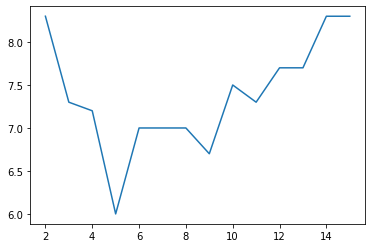

In [20]:
import matplotlib.pyplot as plt 
#Pour trouver le k optimal on va essayer de tester le modèle sur les k de 2 à 15 
errors=[]
for k in range(2,16):

    knn=neighbors.KNeighborsClassifier(k)
    errors.append(100*(1-knn.fit(xtrain,ytrain).score(xtest,ytest)))
plot=plt.plot(range(2,16),errors)


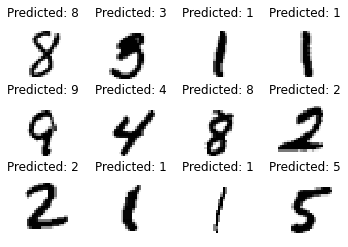

In [51]:
#On voit que l'erreur optimale est avec k=4 

#On prend k=4 et on essaye de faire quelque manipulation

knn=neighbors.KNeighborsClassifier(4)
knn.fit(xtrain,ytrain)

#On récupère les prédictions sur les données test

predicted=knn.predict(xtest)

#On redimonsionne les données sous forme d'image 
image=xtest.reshape((-1,28,28))

#On selectionne 12 images au hasard 
select=np.random.randint(image.shape[0],size=12)

#On affiche les images avec la prédiction associé 

fig,ax=plt.subplots(3,4)

for index,value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis("off")
    plt.imshow(image[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]))

plt.show()
